# Beispiel Dimensionsreduktion und Datenvisualisierung

Um die Dimensionsreduktion ausprobieren zu können, schaust du dir am besten ein Beispiel an. Da du dir viele Dimensionen nur schwer vorstellen kannst, wirst du alles auf zwei Dimensionen reduzieren und intensiv mit Visualisierungen arbeiten.

## Das `digits`-Datenset

Hierzu nutzt du das `digits`-Datenset, das bereits in `scikit-learn` integriert ist. Dabei handelt es sich um handgeschriebene Ziffern. Die Bilder sind dabei auf 8\*8 Pixel reduziert. Jeder Pixel kann Grauwerte von `0` bis `15` annehmen. Es sind insgesamt 1.797 Bilder.

Das Datenset kannst du ganz einfach laden:

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

Du könntest dir nun die Grauwerte anzeigen lassen, aber dabei kannst du nicht viel erkennen. Es ist einfacher, wenn du dir ein paar der Bilder ausgeben lässt:

0


<Figure size 432x288 with 0 Axes>

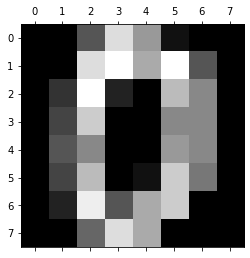

1


<Figure size 432x288 with 0 Axes>

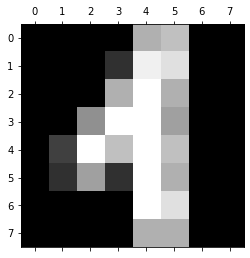

4


<Figure size 432x288 with 0 Axes>

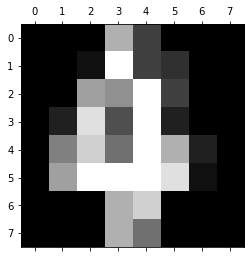

2


<Figure size 432x288 with 0 Axes>

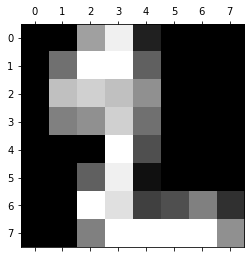

In [2]:
import matplotlib.pyplot as plt
for i in [0, 200, 400, 600]:
    print(digits.target[i])
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

Mit etwas Fantasie und aus größerer Entfernung kannst du die Ziffern erkennen.

Nun konvertierst du die Daten in einen `DataFrame`:

In [3]:
import pandas as pd
df = pd.DataFrame(digits["data"], columns=digits["feature_names"])
df["class"] = [digits["target_names"][target] for target in digits["target"]]
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Du erkennst die Anzahl der Samples und die Features (`target` zählt nicht als Feature.

Ein bisschen Statistik kann nicht schaden:

In [4]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Die obere Zeile scheint nicht stark beschrieben zu sein, sonst kannst du nicht sehr viel erkennen.

## PCA

Als erstes probierst du PCA, also die Hauptkomponentenanalyse aus. Ein Charakteristikum der PCA sind die Eigenwerte. Anhand dieser kannst du entscheiden, auf wie viele Dimensionen du mehr oder weniger *gefahrlos* reduzieren kannst.

Um alle Eigenwerte zu bestimmen, kannst du die Dimensionen gleich lassen:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=digits["data"].shape[1]).fit(digits["data"])

Die Eigenwerte kannst du nun plotten. Der sog. Scree-Plot zeigt die, wie viele Dimensionen du benötigst:

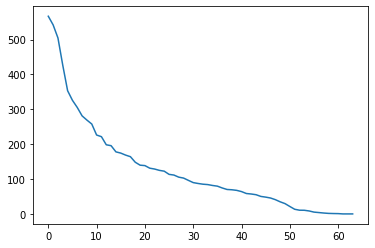

In [6]:
plt.plot(pca.singular_values_)

Das wären bei PCA schon sehr viele Dimensioenen, also sicher 40-50. Das hilft dir hier nicht viel weiter, also probierst du es mit zwei Dimensionen:

In [7]:
pca2 = PCA(n_components=2)

In `scikit-learn` findet die Transformation immer mit der Methode `fit_transform` statt. Das Ergebnis überträgst du gleich in einen `DataFrame` und packst das Target noch mit dazu:

In [8]:
pdf = pd.DataFrame(pca2.fit_transform(digits["data"]), columns=["x", "y"])
pdf["target"] = digits["target"]

Den so entstandenen `DataFrame` kannst du mit einem *Scatterplot* visualisieren. Leider verschiebt `matplotlib` die Skala etwas. Das lässt sich nur mit erheblichem Aufwand korrigieren und gehört eher in einen Visualisierungskurs. Also sei bitte vorsichtig, wenn du die Legende abliest.

<AxesSubplot:xlabel='x', ylabel='y'>

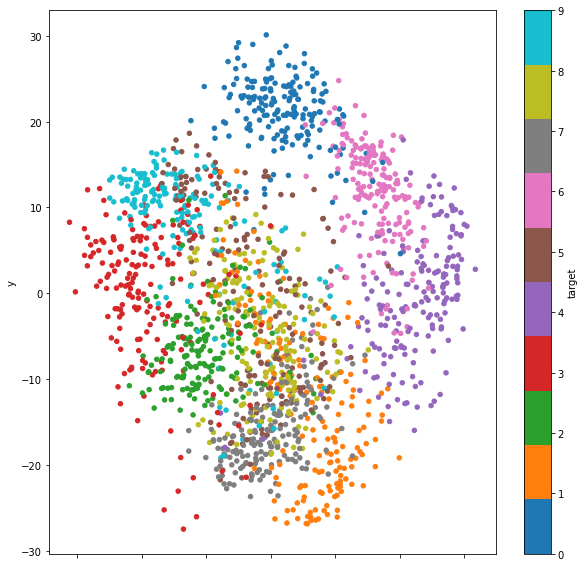

In [9]:
pdf.plot.scatter(x='x', y='y', c="target", figsize=(10,10), cmap="tab10")

Manche Zahlen konnte PCA schon gut voneinander trennen, bei anderen hat das gar nicht geklappt und es gibt große Überlagerungen. Das Ergebnis ist nicht wirklich brauchbar.

## t-SNE

Nun kennst du die Aufrufe von `scikit-learn` schon und kannst nach dem identischen Schema eine Dimensionsreduktion mit t-SNE durchführen:

In [10]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, random_state=42)
tdf = pd.DataFrame(tsne2.fit_transform(digits["data"]), columns=["x", "y"])
tdf["target"] = digits["target"]

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Das dauert eine Weile länger, ist das Ergebnis besser?

<AxesSubplot:xlabel='x', ylabel='y'>

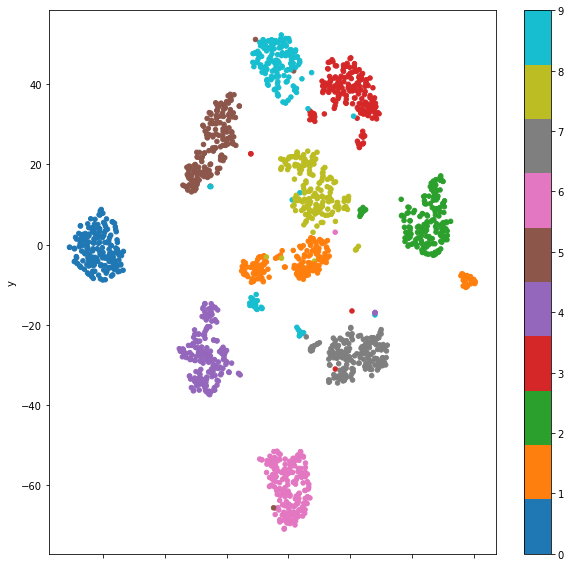

In [11]:
tdf.plot.scatter(x='x', y='y', c=tdf["target"], figsize=(10,10), cmap="tab10")

Das ist ein sehr großer Unterschied! Die einzelnen Ziifern sind sehr deutlich voneinander getrennt, nur die `1` tanzt etwas aus der Reihe. `3` und `9` überlappen sich leicht - das kann einer schlampigen Schrift zugeschrieben werden.

## UMAP

PCA wird doch noch relativ häufig verwendet, t-SNE dagegen eher selten. Es ist langsamer und skaliert nicht gut. Außerdem funktioniert es ähnlich wie UMAP, das deutlich schneller ist. Das probierst du jetzt aus. Leider ist UMAP noch nicht in `scikit-learn` integriert, du musst es manuell installieren:

In [ ]:
!pip install umap-learn[parametric_umap]

Zum Glück ist der Aufruf aber sehr ähnlich (es erbt einige Klassen von `scikit-learn`):

In [12]:
import umap
umap2 = umap.UMAP(n_components=2, random_state=42)
udf = pd.DataFrame(umap2.fit_transform(digits["data"], ), columns=["x", "y"])
udf["target"] = digits["target"]

Wie sieht das Ergrebnis hier aus?

<AxesSubplot:xlabel='x', ylabel='y'>

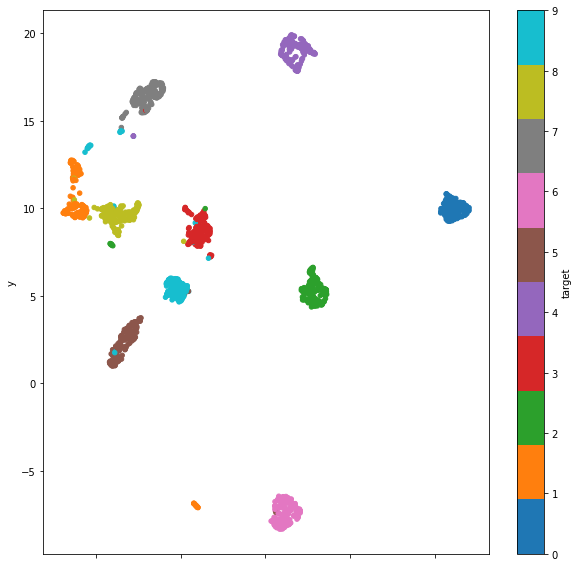

In [13]:
udf.plot.scatter(x='x', y='y', c="target", figsize=(10,10), cmap="tab10")

Die Daten sind noch deutlich besser separiert. In diesem Fall ist UMAP unser "Sieger". Das ist häufig so. UMAP ist in den meisten Fällen das heute beste Verfahren, um Dimensionen zu reduzieren

## Dimensionreduktion als erster Schritt zum Machine Learning

Häufig wirst du mit hochdimensionalen Daten arbeiten müssen. Das ist aber für viele Anwendungen nicht geschickt. Daher solltest du versuchen, die Dimensionen zu reduzieren oder zumindest zu überprüfen, ob das gut funktioniert. PCA ist immer einen Versuch wert, aber in echten Projekten wirst du sicher am häufigsten mit UMAP arbeiten.

t-SNE ist hauptsächlich historisch interessant, weil es 2008 einen neuen Ansatz geboten hat. UMAP ist hier fast immer überlegen